Q) Image Classification Using CIFAR-10 Dataset using simple deep network with 4 hidden layers and 3 dropout layer also apply pruning and quantization to reduce size and report size of model

The shape of train and test data: 
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Class 6: 5000 samples
Class 9: 5000 samples
Class 4: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 3: 5000 samples
Class 5: 5000 samples
Class 0: 5000 samples


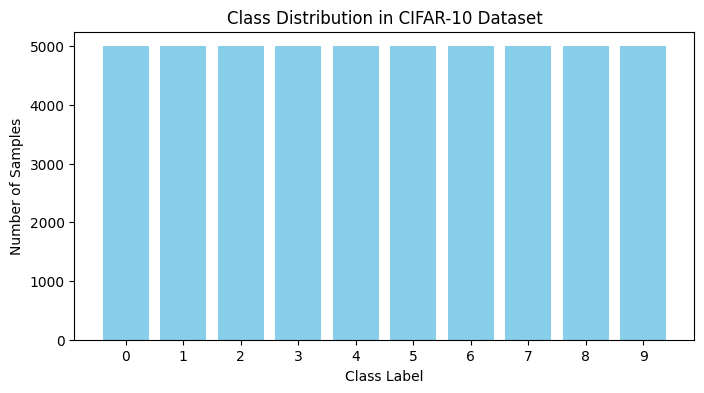

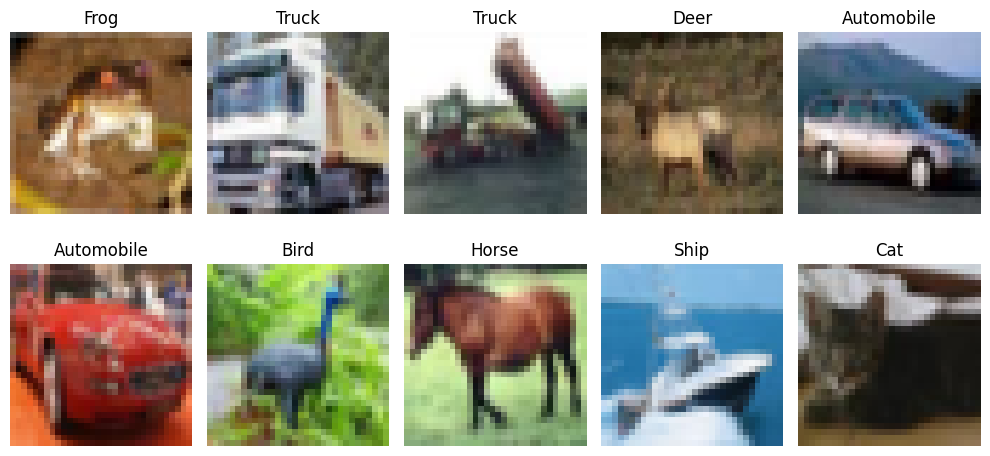

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Data Exploration

print("The shape of train and test data: ")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each class in the training dataset
class_counts = Counter(y_train.flatten())

# Display class distribution
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

# Plot class distribution
plt.figure(figsize=(8, 4))
plt.bar(class_counts.keys(), class_counts.values(), tick_label=list(class_counts.keys()), color='skyblue')
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in CIFAR-10 Dataset")
plt.show()

#Plotting of Sample Images

# CIFAR-10 class labels
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot sample images
num_images = 10  # Number of images to display
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(2, 5, i+1)  # Arrange in 2 rows, 5 columns
    plt.imshow(x_train[i])
    plt.title(class_labels[y_train[i][0]])  # Get class name
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

Training of model: Simple Deep Neural Network and CNN Model

In [ ]:
#DATA PRE-PROCESSING

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 552,714 (2.11 MB)

 Trainable params: 552,714 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 268ms/step - accuracy: 0.3019 - loss: 1.8857 - val_accuracy: 0.5373 - val_loss: 1.4958
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 262ms/step - accuracy: 0.5153 - loss: 1.3548 - val_accuracy: 0.5862 - val_loss: 1.3092
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 274ms/step - accuracy: 0.5787 - loss: 1.1898 - val_accuracy: 0.6059 - val_loss: 1.1859
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 265ms/step - accuracy: 0.6219 - loss: 1.0682 - val_accuracy: 0.6467 - val_loss: 1.1168
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 269ms/step - accuracy: 0.6571 - loss: 0.9876 - val_accuracy: 0.6648 - val_loss: 1.0404
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 263ms/step - accuracy: 0.6783 - loss: 0.9349 - val_accuracy: 0.6834 - val_loss: 0.9744
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 266ms/step - accuracy: 0.6930 - loss: 0.8810 - val_accuracy: 0.6634 - val_loss: 0.9844
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 267ms/step - accuracy: 0.7108 

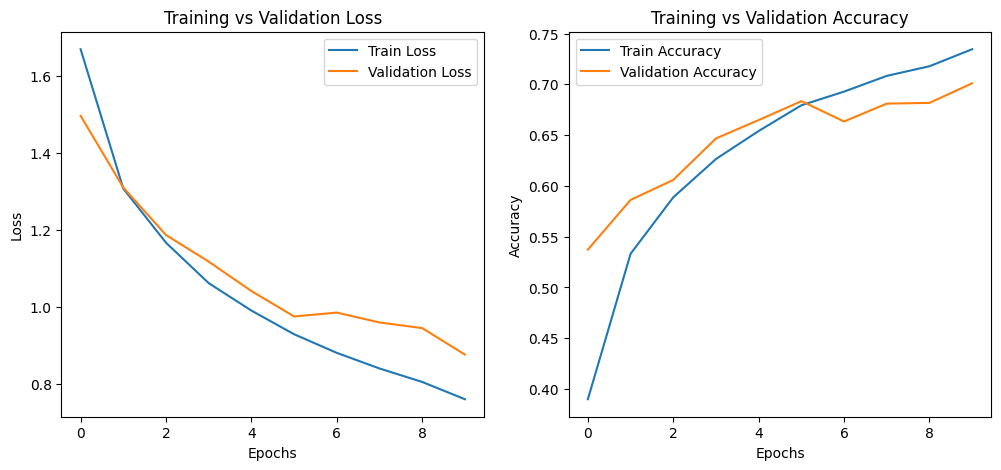

Test Accuracy: 69.89%


In [ ]:
#Building Simple Deep Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Input, Conv2D , MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(32, 32, 3)),  # Explicitly define input shape
    Flatten(),  # Flatten image to 1D
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model_1 = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#print(model.summary())
print(model_1.summary())

history = model_1.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

# Plot Training Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.show()

# Evaluate Test Accuracy
test_loss, test_accuracy = model_1.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
import os

#Applying Pruning and Quantization to reduce the Model Size
def get_model_size(model, filename="original_model.keras"):
    # Save Model
    filepath = f"/content/{filename}"
    model.save(filepath)

    # Get File Size in MB
    size = os.path.getsize(filepath) / (1024 * 1024)  # Convert to MB
    return size

# Report Initial Model Size
initial_size = get_model_size(model, "original_model.keras")
print(f"Initial Model Size: {initial_size:.2f} MB")


tf.get_logger().setLevel("ERROR")
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Use the trained model
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable default quantization
quantized_tflite_model = converter.convert()

# Save the Quantized Model
quantized_model_path = "/content/quantized_model.tflite"
with open(quantized_model_path, "wb") as f:
    f.write(quantized_tflite_model)

print("Quantization completed and model saved as quantized_model.tflite")

def get_quantized_model_size(file_path):
    size = os.path.getsize(file_path) / (1024 * 1024)  # Convert to MB
    return f"{size:.2f} MB"

# Report Quantized Model Size
quantized_size = get_quantized_model_size("/content/quantized_model.tflite")
print(f" Quantized Model Size: {quantized_size}")

#Prunung the Model using Pytorch to reduce model size

import torch
import torch.nn as nn
import torch.nn.utils.prune as prune
import os

# Define the PyTorch Model
class CIFAR10_Model(nn.Module):
    def __init__(self):
        super(CIFAR10_Model, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)  # No softmax, as CrossEntropyLoss applies it
        return x

# Instantiate the model
model = CIFAR10_Model()

# Function to apply pruning
def prune_model(model, amount=0.5):
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):  # Apply pruning to fully connected layers
            prune.l1_unstructured(module, name='weight', amount=amount)

# Apply 50% pruning
prune_model(model, amount=0.5)

# Remove the pruning masks to make the model smaller
for name, module in model.named_modules():
    if isinstance(module, nn.Linear):
        prune.remove(module, 'weight')

# Save the pruned model
torch.save(model.state_dict(), "pruned_model.pth")

# Check the size of the pruned model
pruned_model_size = os.path.getsize("pruned_model.pth") / (1024 * 1024)  # Convert bytes to MB
print(f"Pruned Model Size: {pruned_model_size:.2f} MB")



Initial Model Size: 20.03 MB
Saved artifact at '/tmp/tmpn905drnq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134680658999632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134680658999824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134680659000400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134680658998288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134680658999440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134680659000976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134680652644624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134680652646160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134680652644816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134680652647696: TensorSpec(shape=(), dtype=tf.resource,